# 练习任务2：学习纯numpy构建神经网络，学习卷积机理

MLP结构如下图所示，input层是输入层，Layer[1]到Layer[L-1]是隐层,Layer[L]是输出层，层与层之前每两两个单元（神经元或者输出/输入单元）之间存在连接，代表着一个权重，参考文献[点击我](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)

![MLP结构示意图](https://img-blog.csdnimg.cn/20190325155921920.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NjY3MzY0,size_16,color_FFFFFF,t_70)
![MLP结构示意图2](https://img-blog.csdnimg.cn/20190325155931428.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NjY3MzY0,size_16,color_FFFFFF,t_70)

In [23]:
import numpy as np

In [24]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a/sum_exp_a

def tanh(x):
    y = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return y

def relu(x):
    return np.where(x<0,0,x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Dsigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def onehot(targets, num):
    result = np.zeros((num, 10))
    for i in range(num):
        result[i][targets[i]] = 1
    return result

In [25]:
class NN(object):
    def __init__(self,k_in,k_h,k_out,batch_size,lr):
        self.lr = lr                                        # learning rate
        self.W1 = np.random.randn(k_in,k_h) * 0.01             # initialize
        self.b1 = np.random.randn(k_h) * 0.01
        self.W2 = np.random.randn(k_h, k_out) * 0.01
        self.b2 = np.random.randn(k_out) * 0.01
        self.bs = batch_size
        print(self.W1.shape,self.b1.shape,self.W2.shape,self.b2.shape)
    
    # forward
    def forward(self, X, y):
        self.X = X                                           # m x 784
        self.z1 = np.dot(X, self.W1) + self.b1               # m x 500, the hidden layer
        self.a1 = sigmoid(self.z1)                           # m x 500, the hidden layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2         # m x 10
        self.a2 = sigmoid(self.z2)                           # m x 10
        loss = np.sum((self.a2 - y) * (self.a2 - y)) / 2     # msq
        self.d2 = (self.a2 - y) * Dsigmoid(self.z2)          # m x 10 
        return loss, self.a2

    # backword
    def backward(self):
        dW2 = np.dot(self.a1.T, self.d2) / self.bs                  # 500 x 10
        db2 = np.sum(self.d2, axis=0) / self.bs                     # 10
        d1 = np.dot(self.d2, self.W2.T) * Dsigmoid(self.z1)         # m x 500
        dW1 = np.dot(self.X.T, d1) / self.bs                        # 784x 500
        db1 = np.sum(d1, axis=0) / self.bs                          # 500

        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

In [26]:
def train(k_in,k_h,k_out,batch_size,lr,epochs):
    nn = NN(k_in,k_h,k_out,batch_size,lr)
    eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X = X_train[i:i + batch_size]
            y = y_train[i:i + batch_size]
            # print(X.shape,y.shape)
            loss, _ = nn.forward(X, y)
            nn.backward()
        print("Epoch:", epoch, ">>>>>>>>>", "Loss： {:.3f}".format(loss))
        np.savez("data.npz", w1=nn.W1, b1=nn.b1, w2=nn.W2, b2=nn.b2)
        eval_['cost'].append(loss)
    return eval_

def test():
    r = np.load("data.npz")
    nn = NN(k_in,k_h,k_out,batch_size,lr)
    nn.W1 = r["w1"]
    nn.b1 = r["b1"]
    nn.W2 = r["w2"]
    nn.b2 = r["b2"]
    _, result = nn.forward(X_valid, y_valid)
    result = np.argmax(result, axis=1)
    precison = np.sum(result==Y_valid) /X_valid.shape[0]
    print("Val Precison:", precison)
    
def plotfunc(epochs,eval_):
    plt.plot(range(epochs), eval_['cost'])
    plt.ylabel('Cost')
    plt.xlabel('Epochs')
    # plt.savefig('images/05_03.png', dpi=300)
    plt.show()

In [27]:
from tensorflow.keras.datasets import mnist
import sys
from matplotlib import pyplot as plt
(X_train, Y_train), (X_valid, Y_valid) = mnist.load_data()
X_train=X_train.reshape(60000, 28*28) / 255. 
X_valid=X_valid.reshape(10000, 28*28) / 255. 
y_train = onehot(Y_train, 60000) # (60000, 10)
y_valid = onehot(Y_valid, 10000) # (10000, 10)
print(X_train.shape,y_train.shape,X_valid.shape,Y_valid.shape)
print(np.max(X_train),np.max(X_valid))

(60000, 784) (60000, 10) (10000, 784) (10000,)
1.0 1.0


(784, 500) (500,) (500, 10) (10,)
Epoch: 0 >>>>>>>>> Loss： 85.607
Epoch: 1 >>>>>>>>> Loss： 48.278
Epoch: 2 >>>>>>>>> Loss： 29.897
Epoch: 3 >>>>>>>>> Loss： 21.644
Epoch: 4 >>>>>>>>> Loss： 17.414
Epoch: 5 >>>>>>>>> Loss： 15.033
Epoch: 6 >>>>>>>>> Loss： 13.503
Epoch: 7 >>>>>>>>> Loss： 12.405
Epoch: 8 >>>>>>>>> Loss： 11.573
Epoch: 9 >>>>>>>>> Loss： 10.919
Epoch: 10 >>>>>>>>> Loss： 10.388
Epoch: 11 >>>>>>>>> Loss： 9.944
Epoch: 12 >>>>>>>>> Loss： 9.564
Epoch: 13 >>>>>>>>> Loss： 9.231
Epoch: 14 >>>>>>>>> Loss： 8.935
Epoch: 15 >>>>>>>>> Loss： 8.666
Epoch: 16 >>>>>>>>> Loss： 8.418
Epoch: 17 >>>>>>>>> Loss： 8.188
Epoch: 18 >>>>>>>>> Loss： 7.971
Epoch: 19 >>>>>>>>> Loss： 7.764


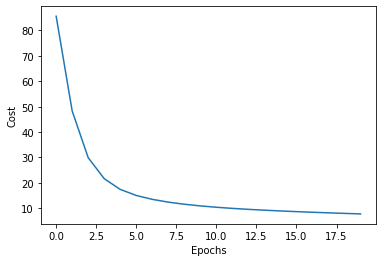

(784, 500) (500,) (500, 10) (10,)
Val Precison: 0.9171


In [28]:
if __name__ == '__main__':
    k_in=X_train.shape[1]
    k_h=500
    k_out=len(np.unique(Y_valid))
    batch_size=200
    epochs=20
    lr=0.5
    eval_=train(k_in,k_h,k_out,batch_size,lr,epochs)
    plotfunc(epochs,eval_)
    test()